# Hebrew letter MNIST Dataset

**Important notice**: Use conda environment tf-m1 with python3.9

Tensorflow for mac needs to be installed.


# Create a conda environment
conda create -n tf-m1 python=3.9
conda activate tf-m1

# Install TensorFlow dependencies
conda install -c apple tensorflow-deps

# Install TensorFlow and Metal API support
pip install tensorflow-macos
pip install tensorflow-metal

# Verify the installation
python -c "import tensorflow as tf; print(tf.__version__); print(tf.config.list_physical_devices('GPU'))"

# load the files with the extracted letters

# load the excel file for the description of the letters

# load the files for the image extraction


In [ ]:
!pip install numpy
!pip install tensorflow


# Import

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Load the MNIST dataset

In [3]:
# Load the dataset
mnist = tf.keras.datasets.mnist

# Split into training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (convert from int to float and scale to 0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Visualize the data

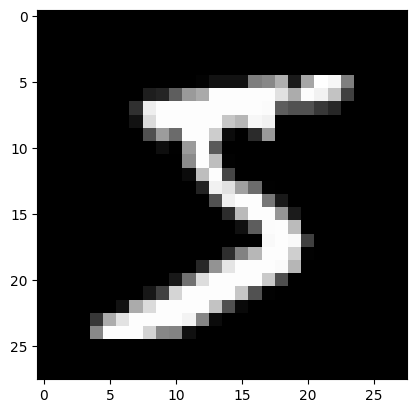

In [4]:
plt.imshow(x_train[0], cmap="gray")
plt.show()


# Build the model

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # Flatten the 28x28 images into a 784 vector
    layers.Dense(128, activation='relu'),    # Hidden layer with 128 neurons
    layers.Dropout(0.2),                     # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')   # Output layer with 10 neurons (one per class)
])


/Users/benni/miniconda3/envs/tf-m1/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-10-05 10:20:58.613449: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-05 10:20:58.613840: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-05 10:20:58.613861: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-05 10:20:58.615605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-05 10:20:58.615682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:

# Compile the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9794 - loss: 0.0651
Epoch 2/5
 526/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9831 - loss: 0.0577

Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Save the model

In [ ]:
model.save('mnist_model.h5')

In [2]:
letters = u'אבגדהוזחטיכךלמםנןסעפףצץקרשת'

In [11]:
import tensorflow as tf
import os

image_directory = 'hebrew_letters'
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
dataset = tf.data.Dataset.from_tensor_slices(image_paths)

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Change 'channels' to 1 for grayscale images
    # Add any additional preprocessing steps here (e.g., resizing, normalizing)
    return image

dataset = dataset.map(load_image)

dataset = dataset.shuffle(buffer_size=len(image_paths))
batch_size = 32  # Specify your desired batch size
dataset = dataset.batch(batch_size)

dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
print(dataset)

# Load and preprocess the images

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the path to your dataset
dataset_path = 'hebrew_letters'

# Load the dataset
img_height = 128  # Set the desired image height
img_width = 128   # Set the desired image width
batch_size = 32  # Batch size for training

# Load the training dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical if you have more than 2 classes
)

# Split the dataset into training and validation sets (80% train, 20% val)
train_size = 0.8
val_size = 0.2
train_dataset = train_dataset.take(int(train_size * len(train_dataset)))
val_dataset = train_dataset.skip(int(val_size * len(train_dataset)))

# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 307 files belonging to 28 classes.


# Build a CNN MOdel

In [19]:
from tensorflow.keras import layers, models


# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to avoid overfitting
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer: one per class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

# View the model summary
model.summary()


AttributeError: '_MapDataset' object has no attribute 'class_names'

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the path to your dataset
dataset_path = 'hebrew_letters'

# Define image size (you can adjust these as needed)
img_height = 64  # Set the desired image height
img_width = 64   # Set the desired image width
batch_size = 32  # Batch size for training

# Load the dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),  # Resize images to (64, 64)
    batch_size=batch_size,
    label_mode='categorical'  # Multi-class classification
)

# Retrieve the class names (labels)
class_names = train_dataset.class_names
print("Class names:", class_names)

# Split the dataset into training and validation sets (80% train, 20% val)
train_size = 0.8
val_size = 0.2
train_dataset = train_dataset.take(int(train_size * len(train_dataset)))
val_dataset = train_dataset.skip(int(val_size * len(train_dataset)))

# Normalize the images (rescaling pixel values between 0 and 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Now, you can access the `class_names` when needed


Found 307 files belonging to 28 classes.
Class names: ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']


# Create a CNN model

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(len(class_names), activation='softmax')  # Output layer with 28 classes
])


# Compile the model

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [23]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.0421 - loss: 3.3550 - val_accuracy: 0.0580 - val_loss: 3.3068
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0713 - loss: 3.3012 - val_accuracy: 0.1250 - val_loss: 3.2105
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.1614 - loss: 3.1575 - val_accuracy: 0.3304 - val_loss: 2.8066
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.2202 - loss: 2.8078 - val_accuracy: 0.5089 - val_loss: 2.1466
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3597 - loss: 2.2128 - val_accuracy: 0.6875 - val_loss: 1.2995
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.4843 - loss: 1.5723 - val_accuracy: 0.8125 - val_loss: 0.8991
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.5869 - loss: 1.4157 - val_accuracy: 0.8438 - val_loss: 0.6883
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6672 - loss: 1.0613 - val_accuracy: 0.8705 - val_loss

# Evaluate the model on the validation set

In [24]:
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation accuracy: {val_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8952 - loss: 0.3052
Validation accuracy: 0.9152


# Save the trained model

In [26]:
# Save the model in the Keras format
model.save('hebrew_letter_model.keras')

# Load the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model saved in Keras format
loaded_model = load_model('hebrew_letter_model.keras')

# You can now use loaded_model for inference or further training


Load and Preprocess the Image

In [29]:
!pip install Pillow

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model('hebrew_letter_model.keras')

# Define image size (must match your training image size)
img_height = 64
img_width = 64

# Load the image using Pillow
img_path = 'hebrew_letters/ג/4.jpg'  # Replace with your actual image path
img = Image.open(img_path)

# Resize the image to match the model's input size
img = img.resize((img_height, img_width))

# Convert the image to a NumPy array
img_array = np.array(img)

# Add a batch dimension (the model expects (1, height, width, 3))
img_array = np.expand_dims(img_array, axis=0)

# Normalize the pixel values to the range [0, 1]
img_array = img_array / 255.0

# Make predictions using the loaded model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Assuming these are the class names (ensure they match your training labels)
class_names = ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']

# Get the predicted label
predicted_label = class_names[predicted_class[0]]
print(f"The model predicts: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
The model predicts: ג


Make a Prediction

In [36]:
# Predict the class of the image
predictions = model.predict(img_array)

# The output will be a probability distribution, so we take the index of the highest probability
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Map the Prediction to Class Names

In [34]:
# Assuming you saved class_names from your training dataset
class_names = ['stop', 'א', 'ב', 'ג', 'ד', 'ה', 'ו', 'ז', 'ח', 'ט', 'י', 'ך', 'כ', 'ל', 'ם', 'מ', 'ן', 'נ', 'ס', 'ע', 'ף', 'פ', 'ץ', 'צ', 'ק', 'ר', 'ש', 'ת']

# Get the predicted class label
predicted_label = class_names[predicted_class[0]]
print(f"The model predicts: {predicted_label}")


The model predicts: ט
